## Analysis

#### Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,pathlib,sys,warnings
warnings.filterwarnings('ignore')
sys.path.append("/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate")
from tqdm import tqdm
import json
import functions.software_commands as software_commands
import functions.statistics as statistics
import defaults

### Streamed Videos

In [2]:
# Reading json file
def read_json(
    path:str
):
    """
    Reading json file
    Args:
        path (str): Path of json file
    """

    with open(path, "r") as f:
        data = json.load(f)
        
    return data

Data = read_json("/home/krishnasrikardurbha/Desktop/Dataset-3/MyFlights.json")

In [3]:
# Setting to File Map
Setting2File = {}

# Actual Data
for flight_name, data in Data.items():
    # Parameters
    settings = data["Settings"]
    settings = (settings["bitrate"], settings["fps"], settings["speed"], settings["scene_complexity"])
    Setting2File[settings] = flight_name


# Simulated Compressed Data
Bitrate2Filenames_Maps = [
    ((2.75, 2.5, 2.25), (1,2,3,13,14,15,25,26,27,37,38,39)),
    ((1.75, 1.5, 1.25), (4,5,6,16,17,18,28,29,30,40,41,42))
]

for bitrates, FlightIDs in Bitrate2Filenames_Maps:
    for b in bitrates:
        for id in FlightIDs:
            # Simulated Filename and Settings
            filename = "flight{}_{}".format(id, b)
            settings = Data["flight{}".format(id)]["Settings"]
            
            settings = (b, settings["fps"], settings["speed"], settings["scene_complexity"])
            Setting2File[settings] = filename

In [13]:
# Loading Metadata
streamed_videos_path = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/streamed_videos/"
quality_dir = "/home/krishnasrikardurbha/Desktop/Dynamic-Frame-Rate/dataset/quality_scores/CONVIQT"

# File2Metadata
File2Metadata = {}

# Metadata
for video_file in os.listdir(streamed_videos_path):
    resolution, fps, b, q = statistics.get_statistics(
        video_path=os.path.join(streamed_videos_path, video_file),
        quality_dir=quality_dir
    )
    File2Metadata[video_file[:-4]] = [fps, b, q]

#### Metrics over Time

Plotting Metrics vs Time

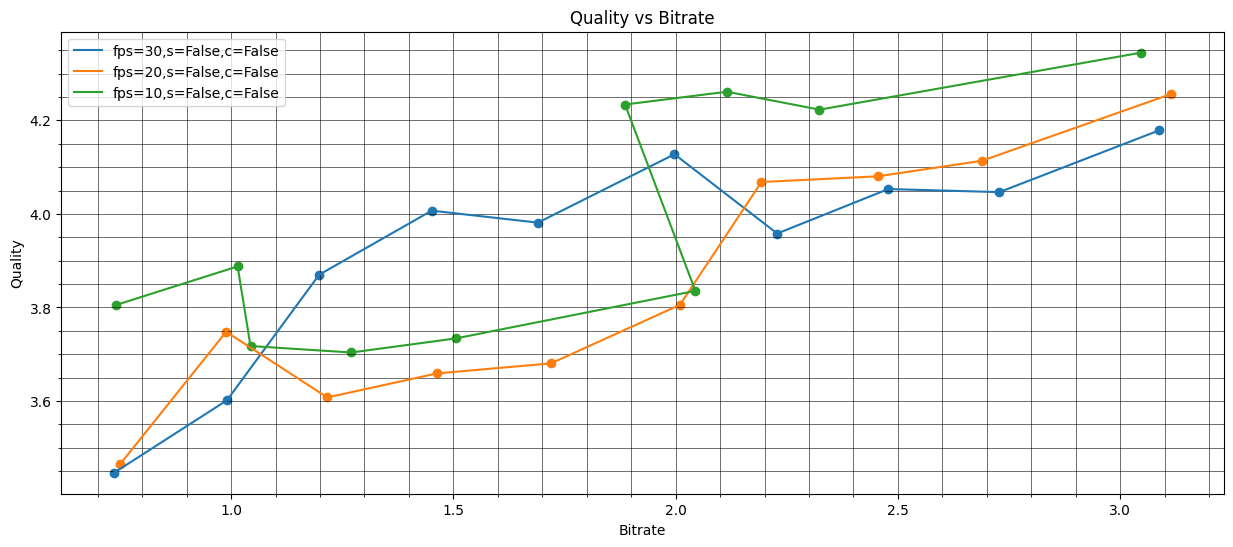

In [25]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Parameters
scene_complexity = False
vehicle_inputs = False

# Plotting Seperately
plt.figure(figsize=(15,6))
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.4', color='black')
plt.title("Quality vs Bitrate")
plt.xlabel("Bitrate")
plt.ylabel("Quality")

for fps in [30, 20, 10]:
    Bitrate = []
    Quality = []
    for b in [3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,0.75]:
        setting = (b, fps, vehicle_inputs, scene_complexity)
        flight_name = Setting2File[setting]
        metadata = File2Metadata[flight_name]
        Quality.append(metadata[2])
        Bitrate.append(metadata[1])

    plt.plot(Bitrate, Quality, label="fps={},s={},c={}".format(fps,vehicle_inputs,scene_complexity))
    plt.scatter(Bitrate, Quality)

plt.legend()
plt.show()

In [ ]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Metric
metrics = ["Quality"]

# Settings
for fps in [30,20,10]:
    settings = [(3, fps, True, False), (2, fps, True, False), (1, fps, True, False), (0.75, fps, True, False)]

    # Plotting Seperately
    plt.figure(figsize=(15,4*len(metrics)))
    plt.minorticks_on()
    for i,metric in enumerate(metrics):
        # Plot
        plt.subplot(len(metrics), 1, i+1)
        plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
        plt.grid(which='minor', linestyle='-', linewidth='0.4', color='black')
        plt.title("{} vs Time".format(metric))
        plt.xlabel("Time")
        plt.ylabel(metric)
        
        for setting in settings:
            flight_name = Setting2File[setting]
            data = File2Metadata[flight_name]

            time = np.asarray(list(data.keys()))
            metadata = np.asarray(list(data.values()))

            if metric == "Quality":
                metric_values = metadata[:, 2]
            elif metric == "Bitrate":
                metric_values = metadata[:, 1]
            else:
                metric_values = metadata[:, 0]

            plt.plot(time, metric_values, label="{},b={},fps={},s={},c={}".format(flight_name,setting[0],setting[1],setting[2],setting[3]))

        plt.legend()

    plt.show()

#### Distrubution of Quality Scores

In [ ]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Metric
metric = "Quality"

# Settings
for b in [3,2.75,2.5,2.25,2,1.75,1.5,1.25,1,0.75]:
    settings = [(b, 30, True, False), (b, 20, True, False), (b, 10, True, False)]

    # Plotting Seperately
    plt.figure(figsize=(15,4*len(metrics)))
    plt.title("{} vs Time".format(metric))
    plt.xlabel("Quality")
    plt.ylabel("Distribution")
    plt.grid()
        
    for setting in settings:
        flight_name = Setting2File[setting]
        data = File2Metadata[flight_name]

        time = np.asarray(list(data.keys()))
        metadata = np.asarray(list(data.values()))

        if metric == "Quality":
            metric_values = metadata[:, 2]
        elif metric == "Bitrate":
            metric_values = metadata[:, 1]
        else:
            metric_values = metadata[:, 0]

        sns.kdeplot(data=metric_values, label="{},b={},fps={},s={},c={}".format(flight_name,setting[0],setting[1],setting[2],setting[3]), fill=True)
        print (flight_name, np.mean(metric_values), np.std(metric_values))

    plt.legend()
    plt.show()

In [ ]:
# Necessary
Metric2Index = {"resolution":0, "fps":1, "bitrate":2, "quality": 3, "quality/bitrate": 4}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Metric
metric = "Quality"

# Settings
for fps in [30,20,10]:
    settings = [(3, fps, True, False), (2, fps, True, False), (1, fps, True, False), (0.75, fps, True, False)]

    # Plotting Seperately
    plt.figure(figsize=(15,4*len(metrics)))
    plt.title("{} vs Time".format(metric))
    plt.xlabel("Quality")
    plt.ylabel("Distribution")
    plt.grid()
        
    for setting in settings:
        flight_name = Setting2File[setting]
        data = File2Metadata[flight_name]

        time = np.asarray(list(data.keys()))
        metadata = np.asarray(list(data.values()))

        if metric == "Quality":
            metric_values = metadata[:, 2]
        elif metric == "Bitrate":
            metric_values = metadata[:, 1]
        else:
            metric_values = metadata[:, 0]

        sns.kdeplot(data=metric_values, label="{},b={},fps={},s={},c={}".format(flight_name,setting[0],setting[1],setting[2],setting[3]), fill=True)
        print (flight_name, np.mean(metric_values), np.std(metric_values))

    plt.legend()
    plt.show()